In [1]:
# Scientific computing
import pandas as pd
import numpy as np
import scipy

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Inspect data

In [74]:
df_full = pd.read_csv('data/heart_2020_cleaned.csv')
print(df_full.info())
df_full.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


The dataset was cleaned, thanks to KAMIL PYTLAK.

In [3]:
# Number of features and instances
df_full.shape, df_full.columns.to_list()

((319795, 18),
 ['HeartDisease',
  'BMI',
  'Smoking',
  'AlcoholDrinking',
  'Stroke',
  'PhysicalHealth',
  'MentalHealth',
  'DiffWalking',
  'Sex',
  'AgeCategory',
  'Race',
  'Diabetic',
  'PhysicalActivity',
  'GenHealth',
  'SleepTime',
  'Asthma',
  'KidneyDisease',
  'SkinCancer'])

# Plans

### Mục tiêu:
- Phân tích được các yếu tố có thể liên quan đến tình trạng tim mạch của một người.
- Trực quan hóa các thông tin quan trọng
- Biến đổi data thành dạng dữ liệu thân thiện với học máy

### Thuộc tính đã có: có 17 thuộc tính độc lập:
- 'BMI': Continuous,
- 'Smoking': Categorical,
- 'AlcoholDrinking' : Categorical,
- 'Stroke': Categorical,
- 'PhysicalHealth': Continuous,
- 'MentalHealth': Continuous,
- 'DiffWalking': Categorical,
- 'Sex': Categorical,
- 'AgeCategory': Categorical,
- 'Race': Categorical,
- 'Diabetic': Categorical,
- 'PhysicalActivity': Categorical,
- 'GenHealth': Continuous,
- 'SleepTime': Continuous,
- 'Asthma': Categorical,
- 'KidneyDisease': Categorical,
- 'SkinCancer': Categorical

### Biến phụ thuộc:

1. Tình trạng mắc bệnh tim 'HeartDisease'.
2. Khả năng mắc bệnh tim, cách tiếp cận cần tính toán thêm dựa trên 'HeartDisease'

### Mô tả kế hoạch:

Đầu tiên tôi sẽ tìm hiểu một vài thông tin thống kê của dataset như tỷ lệ mắc bệnh tim chung, phân phối của các thuộc tính, phát hiện các vấn đề có thể không phù hợp như outlier

Tiếp theo, tôi sẽ tìm hiểu xem những yếu tố nào ảnh hưởng đến khả năng mắc bệnh tim của một người, từ đó có thể đưa ra các yếu tố giúp dự đoán khả năng này. Tôi sẽ dùng một số công cụ kiểm định thống kê, trực quan hóa cho mục đích trên.

Một vài thuộc tính có thể sẽ khó có sẵn khi vào thực tế, có thể chúng ta sẽ cần chọn lựa ra các thuộc tính thực sự có thể ứng dụng.

Cuối cùng, tôi sẽ biến đổi data cho phù hợp với việc sử dụng các thuật toán học máy. Như chúng ta thấy, rất nhiều cột dữ liệu được thể hiện dưới loại dữ liệu object, chúng ta cần biến đổi chúng thành kiểu dữ liệu mà các thuật toán học máy có thể hiểu. Đồng thời, đối với một số cột dữ liệu như BMI, sleep time, tôi sẽ sử dụng binning để vừa thuận tiện cho việc tìm hiểu mối tương quan, và cũng có thể cải thiện kết quả mô hình

Chúng ta sẽ đi qua các bước
1. Statistical Analysis
1. Feature Selection
1. Data Transformation

# Statistical analysis

In [4]:
df_full.describe(include='all')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


## Distribution

In [5]:
cat_cols = []
num_cols = []
for col in df_full.columns:
    if df_full[col].dtype == 'object':
        cat_cols.append(col)
    else:
        num_cols.append(col)
print('Number of categorical columns:', len(cat_cols))
print('Number of numerical columns:', len(num_cols))

Number of categorical columns: 14
Number of numerical columns: 4


In [6]:
def truncate_text(lenght = 8):
    def sub(label):
        if len(label.get_text()) > lenght:
            label.set_text(label.get_text()[:8]+'...')
        return label
    return sub
def create_figure(n_charts, n_cols = 2, ax_width = 5, ax_height = 5, **kwargs):
    n_rows = n_charts//n_cols + int(bool(n_charts%n_cols))
    return plt.subplots(
        nrows=n_rows,
        ncols=n_cols,
        figsize=(ax_width*n_cols, ax_height*n_rows),
        **kwargs)

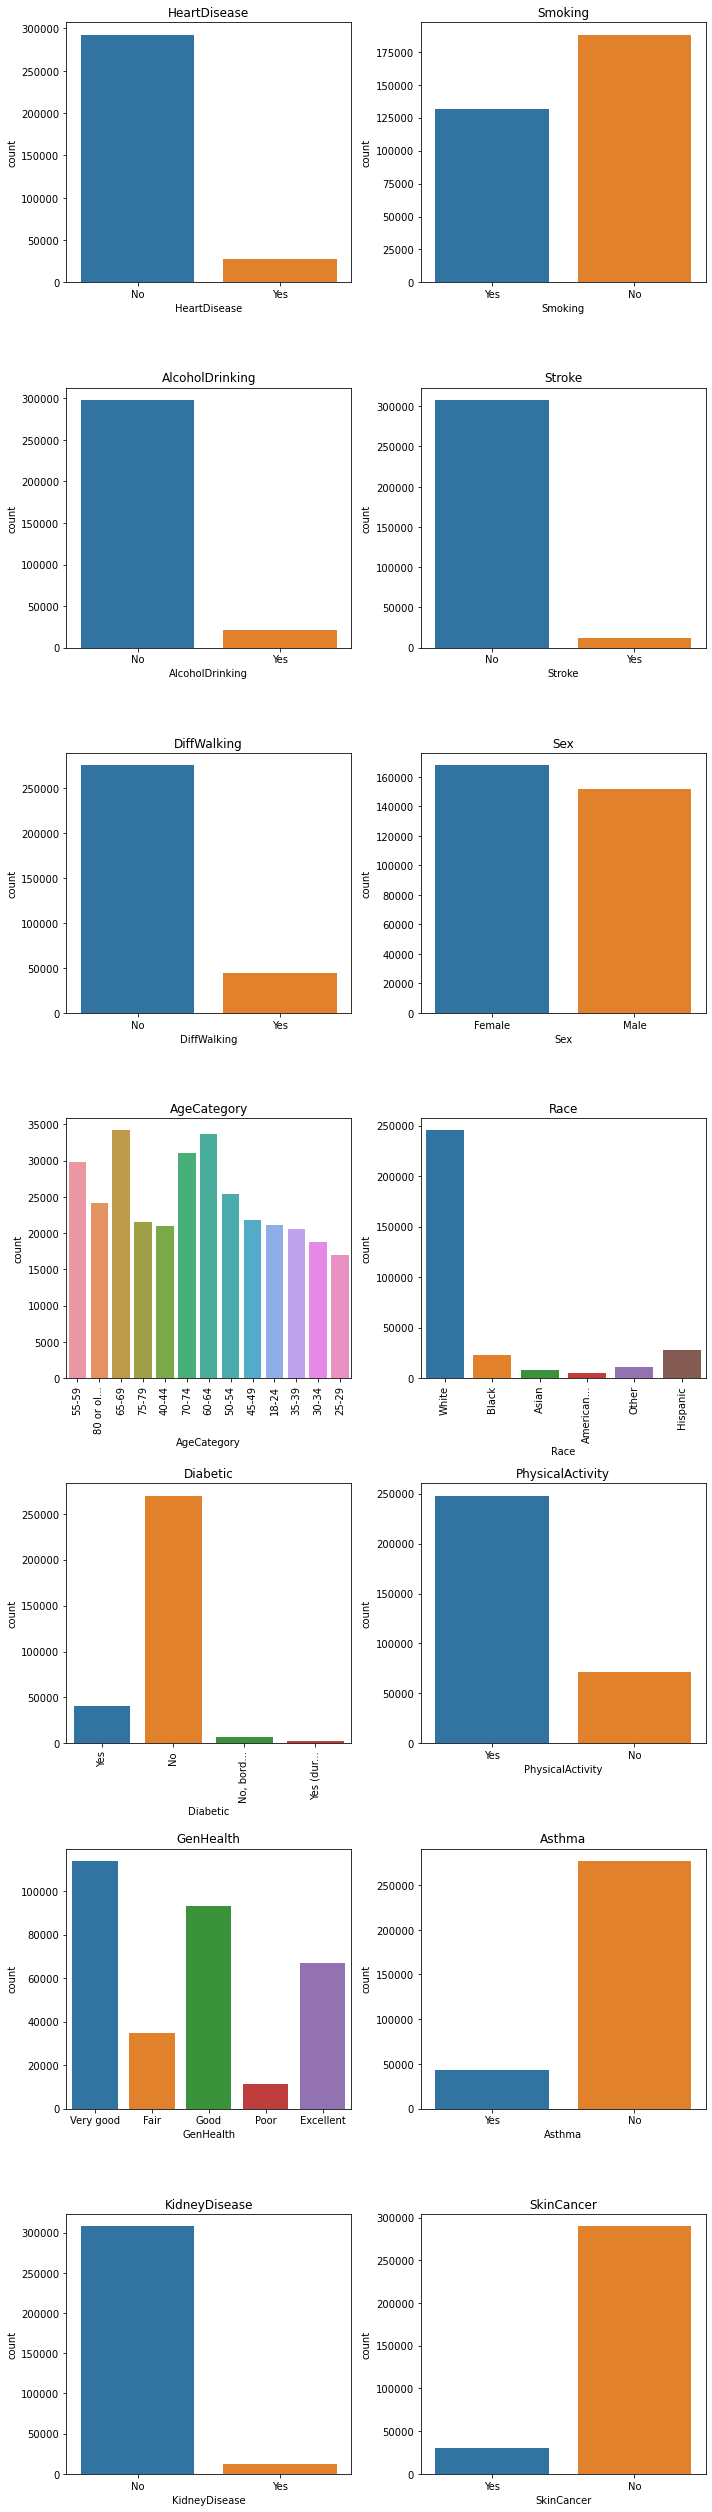

In [7]:
n_charts = len(cat_cols)
fig, ax = create_figure(n_charts)
for i, col in enumerate(cat_cols):
    sns.countplot(x=df_full[col], ax=ax[i//2][i%2])
    ax[i//2][i%2].set_title(col)
    if col in ['AgeCategory', 'Race', 'Diabetic']:
        labels = ax[i//2][i%2].get_xticklabels()
        labels = map(truncate_text(), labels)
        ax[i//2][i%2].set_xticklabels(labels = labels,rotation=90)
plt.tight_layout()

In [8]:
# Function that calculates proportion of heart disease
def analyze_feat(col):
    df_group = df_full.groupby(col)
    proportions = {}
    for group in df_group.groups:
        temp_df = df_group.get_group(group)['HeartDisease'].value_counts()
        if 'Yes' in temp_df:
            proportions[group] = np.round(temp_df['Yes']/temp_df.sum()*100, 1)
        else:
            proportions[group] = 0.0
    return proportions

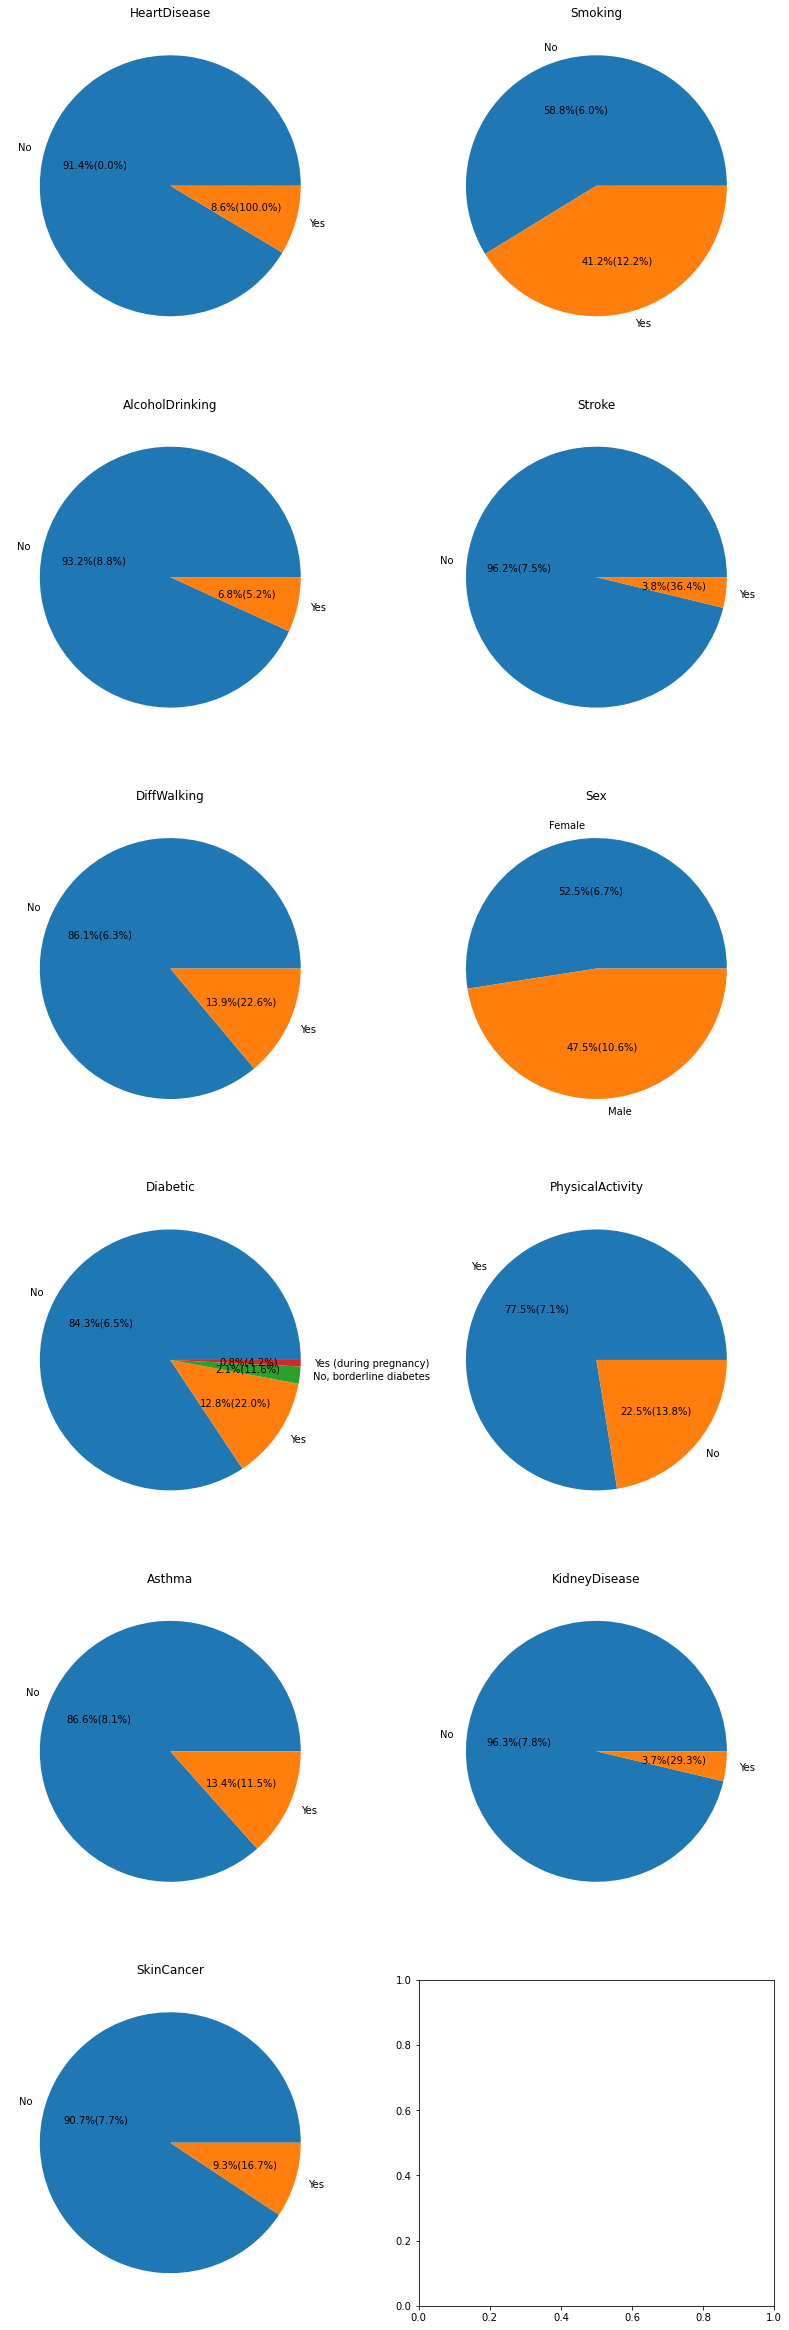

In [9]:
pie_charts = []
for col in cat_cols:
    if df_full[col].nunique() < 5:
        pie_charts.append(col)

n_cols = 2
n_charts = len(pie_charts)
fig, ax = create_figure(n_charts, n_cols=n_cols, ax_width=7, ax_height=7)
proportions = {}
for i, col in enumerate(pie_charts):
    data = df_full[col].value_counts()
    _, _, autotext = ax[i//n_cols][i%n_cols].pie(data,labels=data.index, autopct='%1.1f%%')
    proportions[col] = analyze_feat(col)
    for j, idx in enumerate(data.index):
        if idx in proportions[col]:
            text = autotext[j].get_text()
            text += '(' + str(proportions[col][idx]) + '%)'
            autotext[j].set_text(text) 
    ax[i//n_cols][i%n_cols].set_title(col)
    i += 1
# Number which is inside () indicates Heart disease rate

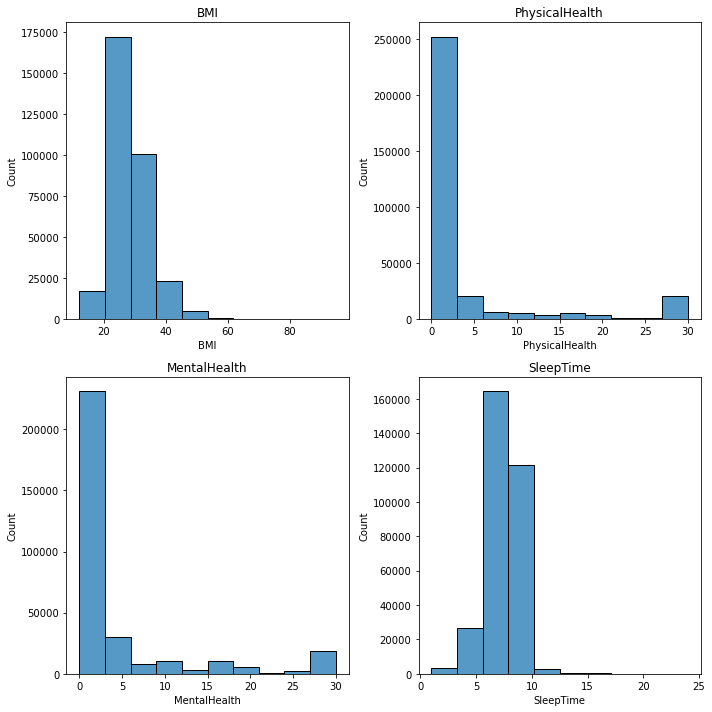

In [10]:
n_charts = len(num_cols)
fig, ax = create_figure(n_charts)
for i, col in enumerate(num_cols):
    sns.histplot(x=df_full[col],bins=10, ax=ax[i//2][i%2])
    ax[i//2][i%2].set_title(col)
plt.tight_layout()

**Nhận xét:** các phân phối rất gần với dân số chung. Tuy nhiên, tỷ lệ người hút thuốc lại cao đột biến (41,2% so với 12.5% theo báo cáo của CDC Hoa Kỳ năm 2020). Chúng ta cần đặt ra câu hỏi tại sao có hiện tượng này và cẩn trọng khi áp dụng kết quả từ mô hình với dân số chung. Thêm nữa, vì cỡ mẫu của chúng ta cũng khá lớn, sự chênh lệch dù là nhỏ với phân phối của dân số chung cũng có ý nghĩa thống kê và cần được cân nhắc. 

## Class analysis

In [11]:
HD = df_full[df_full['HeartDisease'] == 'Yes']
non_HD = df_full[df_full['HeartDisease'] == 'No']
print(HD.shape)
print(non_HD.shape)

(27373, 18)
(292422, 18)


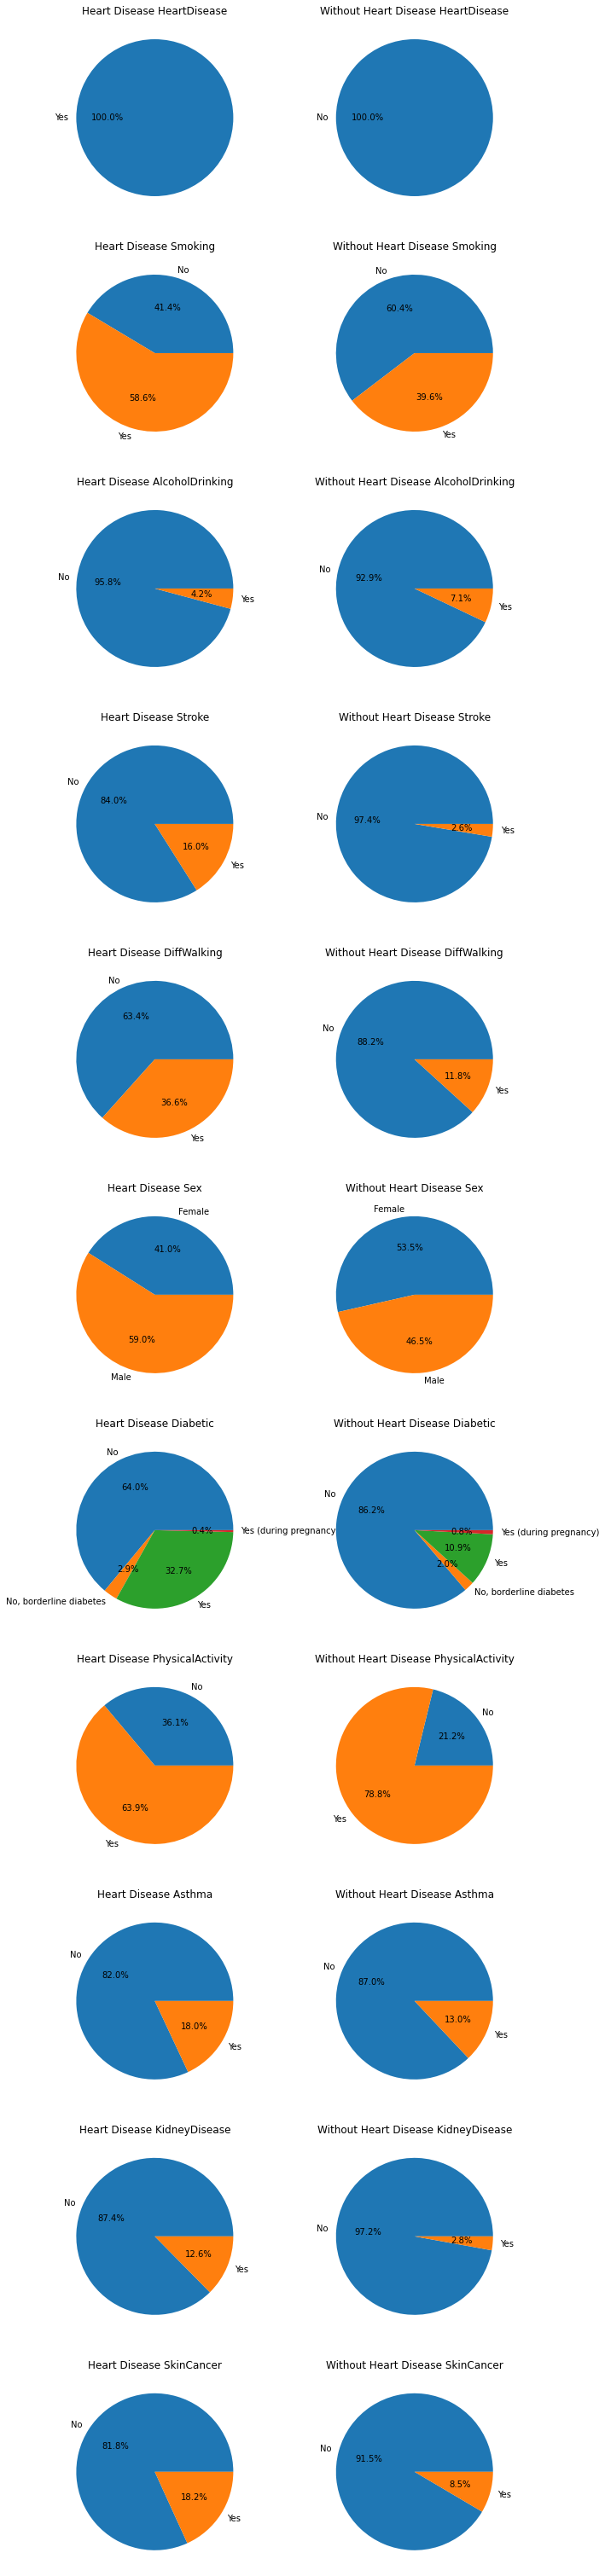

In [12]:
n_charts = len(pie_charts)*2
fig, ax = create_figure(n_charts=n_charts, n_cols=2)
for i, col in enumerate(pie_charts):
    # Heart Disease
    data = HD[col].value_counts().sort_index()
    ax[i][0].pie(data, labels=data.index,autopct='%1.1f%%')
    ax[i][0].set_title('Heart Disease '+col)

    # Non Heart disease
    data = non_HD[col].value_counts().sort_index()
    ax[i][1].pie(data, labels=data.index, autopct='%1.1f%%')
    ax[i][1].set_title('Without Heart Disease '+col)

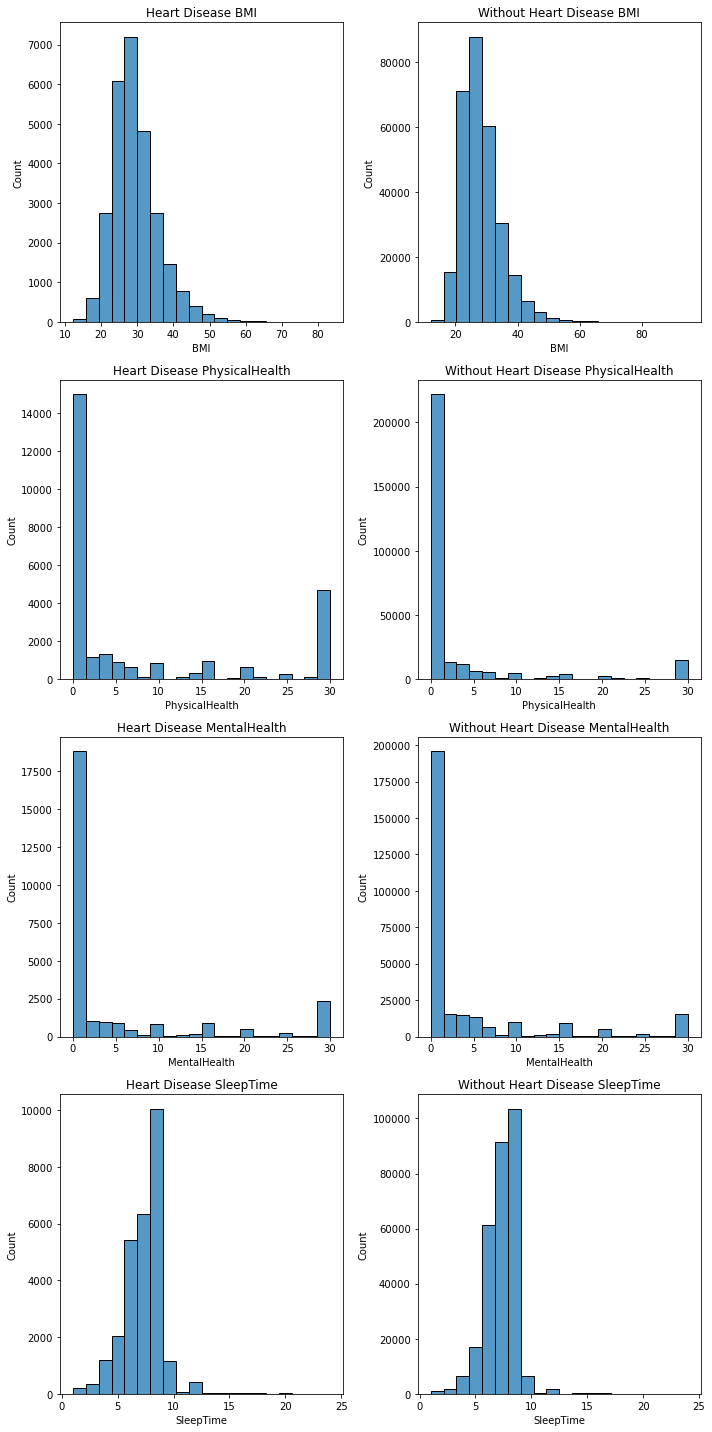

In [13]:
n_charts = len(num_cols)*2
fig, ax = create_figure(n_charts, n_cols=2)
for i, col in enumerate(num_cols):
    sns.histplot(x=HD[col],bins=20, ax=ax[i][0])
    ax[i][0].set_title('Heart Disease '+col)
    sns.histplot(x=non_HD[col],bins=20, ax=ax[i][1])

    ax[i][1].set_title('Without Heart Disease '+col)
plt.tight_layout()

In [14]:
sorted(non_HD['Race'].unique())

['American Indian/Alaskan Native',
 'Asian',
 'Black',
 'Hispanic',
 'Other',
 'White']

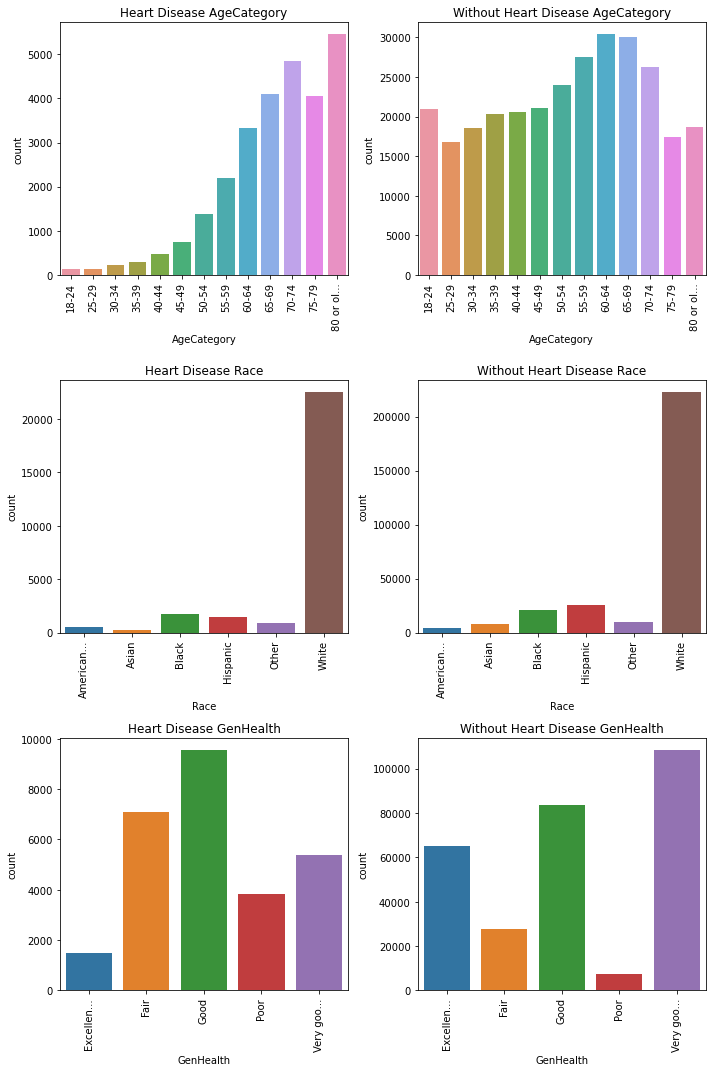

In [15]:
n_charts = len(cat_cols)*2 - len(pie_charts)*2
fig, ax = create_figure(n_charts, n_cols=2)
i = 0
for col in cat_cols:
    if col not in pie_charts:
        # Heart disease
        sns.countplot(x=HD[col], order=sorted(HD[col].unique()), ax=ax[i][0])
        ax[i][0].set_title('Heart Disease '+col)
        labels = ax[i][0].get_xticklabels()
        labels = map(truncate_text(), labels)
        ax[i][0].set_xticklabels(labels = labels,rotation=90)
        # Non heart disease
        sns.countplot(x=non_HD[col], ax=ax[i][1], order=sorted(non_HD[col].unique()))
        ax[i][1].set_title('Without Heart Disease '+col)
        labels = ax[i][1].get_xticklabels()
        labels = map(truncate_text(), labels)
        ax[i][1].set_xticklabels(labels = labels,rotation=90)
        i+=1
plt.tight_layout()

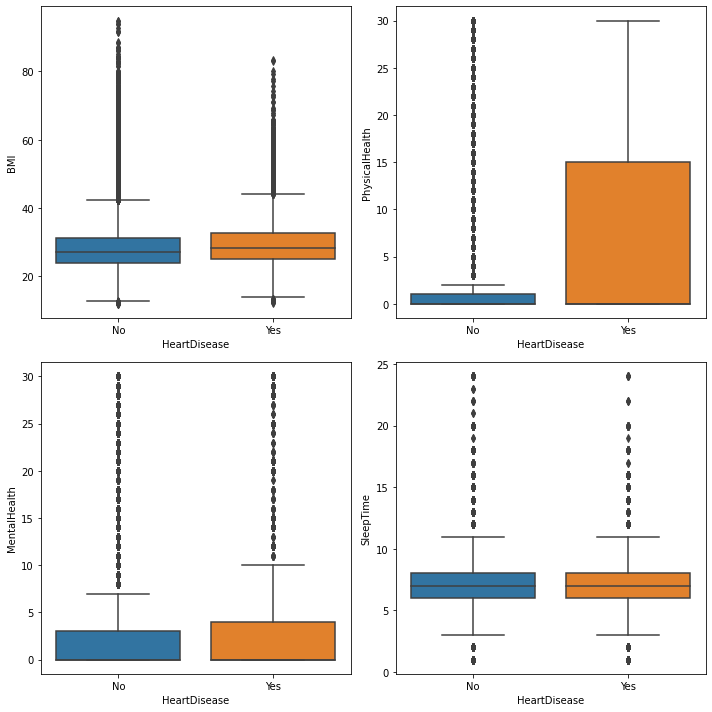

In [29]:
n_charts = len(num_cols)
fig, ax = create_figure(n_charts, n_cols=2)
for i, col in enumerate(num_cols):
    sns.boxplot(data=df_full,x='HeartDisease', y=col, ax=ax[i//2][i%2])
plt.tight_layout()

Dựa trên các biểu đồ, ta thấy rằng, có một số đặc tính có sư khác biệt mạnh giữa nhóm có bệnh lý tim mạch và không có bệnh lý tim mạch như `Smoking`, `Stroke`, `Diabetic`,... Ta sẽ tìm hiểu thêm về các nhóm này trong phần feature selection. Một điều rất thú vị, là khi xem biểu đồ của `BMI` hay `SleepTime` thì có vẻ nó trông rất giốn nhau giữa nhóm có bệnh và không, rõ ràng một người ngủ quá nhiều hay quá ít đều không tốt, hãy thử kiểm chứng bên dưới. Ngoài ra, ta nhận thấy có rất nhiều outlier, đây cũng cần được xem xét

Text(0, 0.5, 'Rate')

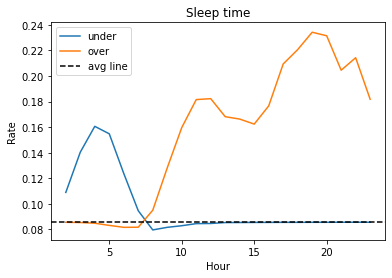

In [16]:
x = []
y = []
for hour in range(0, 24):
    idx = df_full['SleepTime'] < hour
    a = df_full[idx]
    b = df_full[~idx]

    if a.shape[0] > 0 and b.shape[0] > 0:
        hd_a = a['HeartDisease'].value_counts()/a.shape[0]
        hd_b = b['HeartDisease'].value_counts()/b.shape[0]
        x.append(int(hour))
        y.append([hd_a['Yes'],hd_b['Yes']])
lines = plt.plot(x,y)
avg_line = plt.axhline((df_full['HeartDisease'].value_counts()/df_full.shape[0])['Yes'],linestyle='--', c='k', label='avg rate')
plt.legend(lines+[avg_line], ['under', 'over', 'avg line'])
plt.title('Sleep time')
plt.xlabel('Hour')
plt.ylabel('Rate')


Text(0, 0.5, 'Rate')

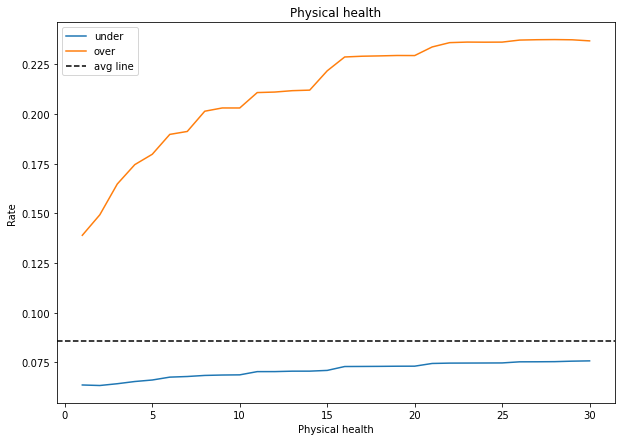

In [17]:
x = []
y = []
plt.figure(figsize=(10, 7))
for score in range(int(df_full['PhysicalHealth'].min()), int(df_full['PhysicalHealth'].max())+1):
    idx = df_full['PhysicalHealth'] < score
    a = df_full[idx]
    b = df_full[~idx]

    if a.shape[0] > 0 and b.shape[0] > 0:
        hd_a = a['HeartDisease'].value_counts()/a.shape[0]
        hd_b = b['HeartDisease'].value_counts()/b.shape[0]
        x.append(int(score))
        y.append([hd_a['Yes'],hd_b['Yes']])
lines = plt.plot(x,y)
avg_line = plt.axhline((df_full['HeartDisease'].value_counts()/df_full.shape[0])['Yes'],linestyle='--', c='k', label='avg rate')
plt.legend(lines+[avg_line], ['under', 'over', 'avg line'])
plt.title('Physical health')
plt.xlabel('Physical health')
plt.ylabel('Rate')

Text(0, 0.5, 'Rate')

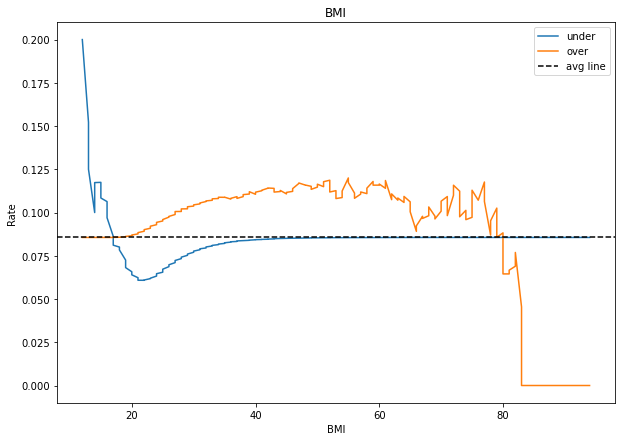

In [18]:
x = []
y = []
plt.figure(figsize=(10, 7))
for score in np.arange(df_full['BMI'].min(), df_full['BMI'].max(), 0.5):
    idx = df_full['BMI'] < score
    a = df_full[idx]
    b = df_full[~idx]

    if a.shape[0] > 0 and b.shape[0] > 0:
        hd_a = a['HeartDisease'].value_counts()/a.shape[0]
        hd_b = b['HeartDisease'].value_counts()/b.shape[0]
        x.append(int(score))
        temp=[]
        if 'Yes' in hd_a:
            temp.append(hd_a['Yes'])
        else:
            temp.append(0)
        if 'Yes' in hd_b:
            temp.append(hd_b['Yes'])
        else:
            temp.append(0)
        y.append(temp)
lines = plt.plot(x,y)
avg_line = plt.axhline((df_full['HeartDisease'].value_counts()/df_full.shape[0])['Yes'],linestyle='--', c='k', label='avg rate')
plt.legend(lines+[avg_line], ['under', 'over', 'avg line'])
# ticks = plt.xticks([i for i in range(len(x))], labels=x)
plt.title('BMI')
plt.xlabel('BMI')
plt.ylabel('Rate')

Text(0, 0.5, 'Rate')

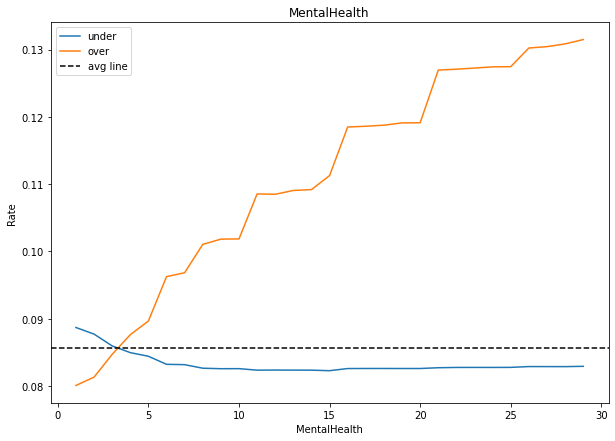

In [19]:
x = []
y = []
plt.figure(figsize=(10, 7))
for score in np.arange(df_full['MentalHealth'].min(), df_full['MentalHealth'].max(), 1):
    idx = df_full['MentalHealth'] < score
    a = df_full[idx]
    b = df_full[~idx]

    if a.shape[0] > 0 and b.shape[0] > 0:
        hd_a = a['HeartDisease'].value_counts()/a.shape[0]
        hd_b = b['HeartDisease'].value_counts()/b.shape[0]
        x.append(int(score))
        temp=[]
        if 'Yes' in hd_a:
            temp.append(hd_a['Yes'])
        else:
            temp.append(0)
        if 'Yes' in hd_b:
            temp.append(hd_b['Yes'])
        else:
            temp.append(0)
        y.append(temp)
lines = plt.plot(x,y)
avg_line = plt.axhline((df_full['HeartDisease'].value_counts()/df_full.shape[0])['Yes'],linestyle='--', c='k', label='avg rate')
plt.legend(lines+[avg_line], ['under', 'over', 'avg line'])
# ticks = plt.xticks([i for i in range(len(x))], labels=x)
plt.title('MentalHealth')
plt.xlabel('MentalHealth')
plt.ylabel('Rate')

Ta thấy rằng, ở ngưỡng khoảng dưới 6 giờ ngủ một ngày, tỷ lệ mắc bệnh tim cao hơn hẳn so với ngủ trên 6 giờ. Tuy nhiên khi số giờ ngủ là trên 9 thì lúc này tỷ lệ mắc bệnh lại cao hơn là ngủ dưới 9 giờ

Nhóm có điểm physical health lớn hơn 0 đều cho thấy nguy cơ mắc bệnh tim là cao hơn mức trung bình

Với BMI, ngoài nhóm khoảng dưới 15 có tỷ lệ mắc bệnh tim cao thì các ngưỡng còn lại có vẻ không tốt để phân loại

Qua các biểu đồ này ta cũng cần lưu ý rằng, có thể việc thể hiện một chỉ số nào trên đây có thể là hệ quả của việc mắc bệnh tim hơn là yếu tố giúp dự đoán, ví dụ như ngủ quá nhiều hay BMI quá thấp, hay điểm số Physical health quá cao (càng cao càng xấu). Đây là vấn đề cần xem xét, vì nếu nó chỉ là hệ quả thì việc dùng nó để dự báo khả năng mắc bệnh là không hợp lý

## Outlier

In [20]:
num_df = df_full[num_cols]
num_df.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0


In [21]:
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR_15 = (Q3 - Q1)*1.5
IQR_15
min_acp = Q1 - IQR_15
max_acp = Q3 + IQR_15
min_acp, max_acp

(BMI               12.945
 PhysicalHealth    -3.000
 MentalHealth      -4.500
 SleepTime          3.000
 dtype: float64,
 BMI               42.505
 PhysicalHealth     5.000
 MentalHealth       7.500
 SleepTime         11.000
 dtype: float64)

In [22]:
# Instance is lower than min acceptable threshold will be indicated by -1
# higher one will get value = 1
outlier_df = (num_df > max_acp).astype(np.int8) - (num_df < min_acp).astype(np.int8)
outlier_df.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,0,0,1,0
1,0,0,0,0
2,0,1,1,0
3,0,0,0,0
4,0,1,0,0


# Feature selection

Với các cột phân nhóm tôi sẽ chọn ra các cột mà có sự chênh lệch tần suất mắc bệnh trên 1.5 lần

In [89]:
# Categorical columns
relevant_cols = ['AgeCategory', 'Race', 'GenHealth']
for col in proportions:
    val = proportions[col].values()
    if min(val) == 0 or max(val)/min(val)>=1.5:
        relevant_cols.append(col)
# Numerical columns
relevant_cols += num_cols
len(relevant_cols),relevant_cols

(17,
 ['AgeCategory',
  'Race',
  'GenHealth',
  'HeartDisease',
  'Smoking',
  'AlcoholDrinking',
  'Stroke',
  'DiffWalking',
  'Sex',
  'Diabetic',
  'PhysicalActivity',
  'KidneyDisease',
  'SkinCancer',
  'BMI',
  'PhysicalHealth',
  'MentalHealth',
  'SleepTime'])

Ở đây tôi cũng muốn nhấn mạnh, tới đây ta thấy rõ ràng đây sẽ không phải là một dataset tốt dùng để "dự báo" liệu một người có bị bệnh tim hay không, đây phù hợp hơn là một dataset tìm hiểu về bệnh tim. Và chính vì thế, chúng ta sẽ thay đổi mục đích, thay vì dự báo, ta sẽ tìm hiểu ta cần làm gì để xây dựng một dataset giúp "dự báo bệnh tim"

Có một vài lý do khiến đây không phải là một dataset để dự báo:
- Dữ liệu được ghi nhận ngay tại thời điểm mà đã biết một người đã mắc bệnh tim hay không
- Người bị bệnh tim có thể đã chịu những hậu quả của bệnh tim và làm thay đổi các yếu tố sức khỏe
- Có quá ít các yếu tố thực sự có thể áp dụng vào thực tế. Ví dụ, một người đã biết mình bị stroke thì sẽ được trải qua các quy trình khám, xét nghiệm kỹ càng xác nhận việc có bệnh tim hay không. Vì thế tuy stroke có mối tương quan cao, nhưng việc dùng nó để dự báo là không hợp lý (vì người đó khả năng cao cũng đã biết tình trạng bệnh tim của mình), tương tự như thế với Asthma, SkinCancer, KidneyDisease

Như kết luận bên trên, sau khi loại tất cả những thuộc tính có thể bị ảnh hưởng, ta sẽ chỉ còn có thể giữ lại:
'BMI', 'Smoking', 'AlcoholDrinking', 'Sex', 'AgeCategory', 'Race', 'Diabetic'

Tuy nhiên, tôi vẫn tạo ra thêm một dataset với các yếu tố có tương quan cao mà không quan tâm đến ứng dụng thực tế cho mục đích tìm hiểu

In [90]:
selective_cols = ['BMI', 'Smoking', 'AlcoholDrinking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'HeartDisease']

# Transform data

In [75]:
map_dict = {}
map_dict['GenHealth'] = {'Poor': 0,
                        'Fair': 1,
                        'Good': 2,
                        'Very good': 3,
                        'Excellent': 4}
map_dict['Diabetic'] = {'No': 0,
                        'No, borderline diabetes': 1,
                        'Yes (during pregnancy)': 2,
                        'Yes': 3}
            
for col in cat_cols:
    if col not in ['GenHealth', 'Diabetic']:
        df_full[col] = df_full[col].astype('category')
        map_dict[col] = dict([(c, i) for i,c in enumerate(df_full[col].cat.categories)])
        df_full[col] = df_full[col].cat.codes.astype(np.int32)
    else:
        df_full[col] = df_full[col].map(map_dict[col]).astype(np.int32)

In [76]:
df_full.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,3,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,3,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,3,8.0,0,0,0


In [84]:
import json
with open('map_dict.json', 'w') as f:
    json_format = json.dumps(map_dict)
    f.write(json_format)
with open('map_dict.json', 'r') as f:
    data = json.load(f)
data

{'GenHealth': {'Poor': 0,
  'Fair': 1,
  'Good': 2,
  'Very good': 3,
  'Excellent': 4},
 'Diabetic': {'No': 0,
  'No, borderline diabetes': 1,
  'Yes (during pregnancy)': 2,
  'Yes': 3},
 'HeartDisease': {'No': 0, 'Yes': 1},
 'Smoking': {'No': 0, 'Yes': 1},
 'AlcoholDrinking': {'No': 0, 'Yes': 1},
 'Stroke': {'No': 0, 'Yes': 1},
 'DiffWalking': {'No': 0, 'Yes': 1},
 'Sex': {'Female': 0, 'Male': 1},
 'AgeCategory': {'18-24': 0,
  '25-29': 1,
  '30-34': 2,
  '35-39': 3,
  '40-44': 4,
  '45-49': 5,
  '50-54': 6,
  '55-59': 7,
  '60-64': 8,
  '65-69': 9,
  '70-74': 10,
  '75-79': 11,
  '80 or older': 12},
 'Race': {'American Indian/Alaskan Native': 0,
  'Asian': 1,
  'Black': 2,
  'Hispanic': 3,
  'Other': 4,
  'White': 5},
 'PhysicalActivity': {'No': 0, 'Yes': 1},
 'Asthma': {'No': 0, 'Yes': 1},
 'KidneyDisease': {'No': 0, 'Yes': 1},
 'SkinCancer': {'No': 0, 'Yes': 1}}

In [91]:
df_selective = df_full[selective_cols]
df_relevant = df_full[relevant_cols]
df_selective.shape, df_relevant.shape

((319795, 8), (319795, 17))

In [88]:
outlier_df.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,0,0,1,0
1,0,0,0,0
2,0,1,1,0
3,0,0,0,0
4,0,1,0,0


In [92]:
df_selective.to_csv('data/selective_features.csv', index=True)
df_relevant.to_csv('data/relevant_features.csv', index=True)
outlier_df.to_csv('data/outliers.csv', index=True)